In [1]:
from sre_parse import State

import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.synthesis import TwoQubitWeylDecomposition
from qiskit.circuit.library import UnitaryGate

In [2]:
def cartanCircuit(VCxGate, transGate):
    circ = QuantumCircuit(2)
    phi = np.arctan(1 + np.sqrt(3))

    
    #qubit 0 after VCx
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)

    #qubit 1 after VCx
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)
    
    circ.append(VCxGate.decompose(), [0, 1])

    
    #qubit 0
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)

    #qubit 1
    circ.p(15 * np.pi / 16, 1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)

    circ.append(transGate.conjugate(), [0])
    circ.append(transGate.conjugate(), [1])
    
    return circ

In [3]:
pi = np.pi
sqrt = np.sqrt
log = np.log

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)


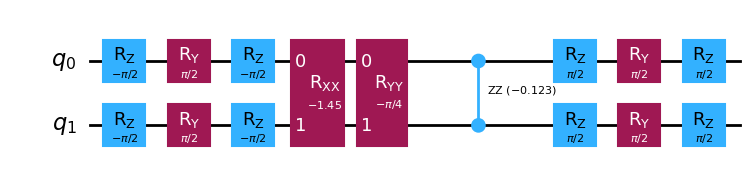

In [4]:
weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()
VCxGate.draw('mpl')

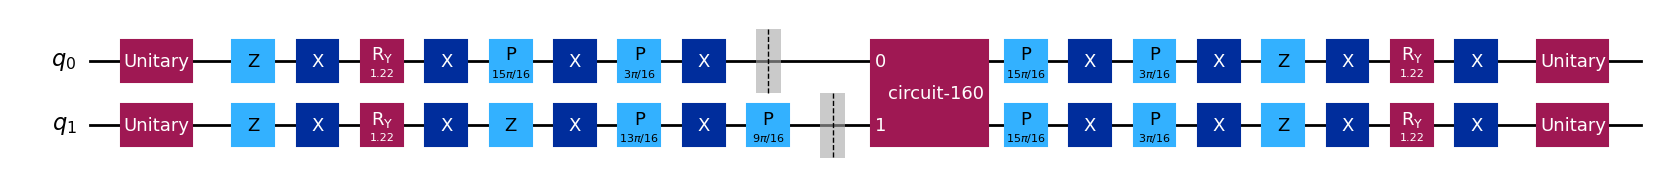

In [5]:
basisTransformationMatrix = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])
#basisTransformationMatrix = np.identity(2)
uniGate = UnitaryGate(basisTransformationMatrix)
cartanCirc = cartanCircuit(VCxGate, uniGate)
cartanCirc.draw('mpl')

In [6]:
Statevector(cartanCirc).draw('latex')

<IPython.core.display.Latex object>

In [7]:
Statevector(cartanCirc).to_operator().to_matrix().round(3)

array([[0.467+0.j, 0.125-0.j, 0.125-0.j, 0.467+0.j],
       [0.125+0.j, 0.033+0.j, 0.033-0.j, 0.125+0.j],
       [0.125+0.j, 0.033+0.j, 0.033+0.j, 0.125+0.j],
       [0.467-0.j, 0.125-0.j, 0.125-0.j, 0.467+0.j]])

In [8]:
Operator(cartanCirc).draw('latex')

<IPython.core.display.Latex object>

In [9]:
Operator(cartanCirc).to_matrix().round(3)

array([[ 0.683-0.j ,  0.183-0.j ,  0.183+0.j ,  0.683-0.j ],
       [ 0.183-0.j ,  0.394+0.5j,  0.394-0.5j, -0.394+0.j ],
       [ 0.183+0.j ,  0.394-0.5j,  0.394+0.5j, -0.394+0.j ],
       [ 0.683-0.j , -0.394+0.j , -0.394+0.j , -0.472+0.j ]])

In [10]:
Operator(uniGate).tensor(Operator(uniGate)).dot(cartanCirc).dot(Operator(uniGate.conjugate()).tensor(Operator(uniGate.conjugate()))).to_matrix().round(3)

array([[ 0.577-0.j ,  0.577-0.j ,  0.577-0.j , -0.   -0.j ],
       [ 0.577-0.j , -0.289+0.5j, -0.289-0.5j,  0.   -0.j ],
       [ 0.577-0.j , -0.289-0.5j, -0.289+0.5j,  0.   -0.j ],
       [ 0.   -0.j ,  0.   -0.j ,  0.   -0.j ,  1.   -0.j ]])

In [11]:
n = 3
listOfQudtis = [[i, i+1] for i in range(n)]
listOfQudtis

[[0, 1], [1, 2], [2, 3]]

In [12]:
def CZqutrit(transGate):
    circ = QuantumCircuit(4, name="CZ")
    
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.append(transGate, [2])
    circ.append(transGate, [3])
    omega = 2*np.pi/3
    
    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 3)
    circ.cp(-1 * omega, 1, 2)

    circ.append(transGate.conjugate().transpose(), [0])
    circ.append(transGate.conjugate().transpose(), [1])
    circ.append(transGate.conjugate().transpose(), [2])
    circ.append(transGate.conjugate().transpose(), [3])
    
    return circ

In [13]:
czqutrit = CZqutrit(uniGate)

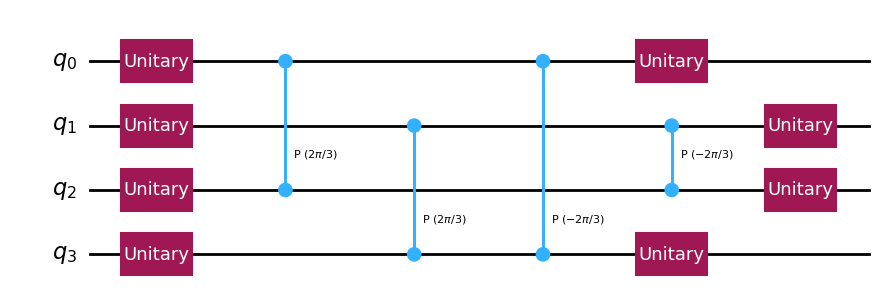

In [14]:
czqutrit.draw('mpl')

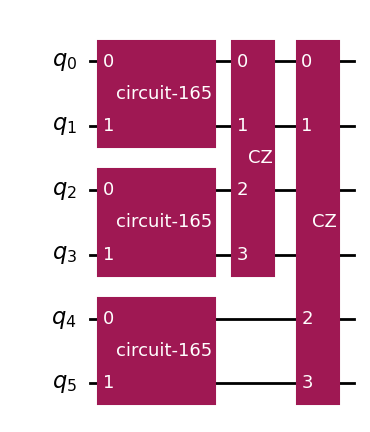

In [15]:
ghzcirc = QuantumCircuit(6)
ghzcirc.append(cartanCirc, [0, 1])
ghzcirc.append(cartanCirc, [2, 3])
ghzcirc.append(cartanCirc, [4, 5])
ghzcirc.append(czqutrit, [0, 1, 2, 3])
ghzcirc.append(czqutrit, [0, 1, 4, 5])

ghzcirc.draw('mpl')

In [16]:
from qiskit.quantum_info import Statevector
ghzState = Statevector(ghzcirc)
ghzMatrix = ghzState.data.reshape((64,1))

In [17]:
testWeyly = TwoQubitWeylDecomposition(Operator(cartanCirc).to_matrix())
optiF = testWeyly.circuit()

In [18]:
Statevector(optiF).draw('latex')

<IPython.core.display.Latex object>

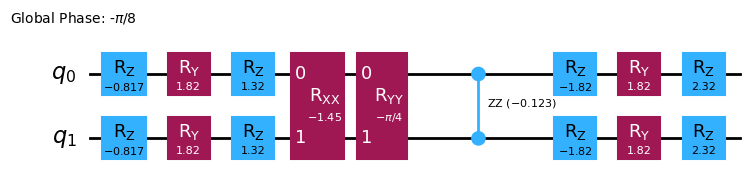

In [19]:
optiF.draw('mpl')

In [20]:
cartanCircH = Operator(cartanCirc).conjugate().transpose()

changeToDefault = cartanCircH.tensor(cartanCircH).tensor(Operator(np.identity(4))).to_matrix()

default = np.dot(changeToDefault, ghzMatrix)

In [21]:
Statevector(default).draw('latex')

<IPython.core.display.Latex object>

In [22]:
from qiskit.quantum_info import partial_trace

In [23]:
pt0 = partial_trace(ghzState, [2, 3, 4, 5])
pt1 = partial_trace(ghzState, [0, 1, 4, 5])
pt2 = partial_trace(ghzState, [0, 1, 2, 3])

In [24]:
pt0.draw('latex')

<IPython.core.display.Latex object>

In [25]:
pt1.draw('latex')

<IPython.core.display.Latex object>

In [26]:
pt2.draw('latex')

<IPython.core.display.Latex object>

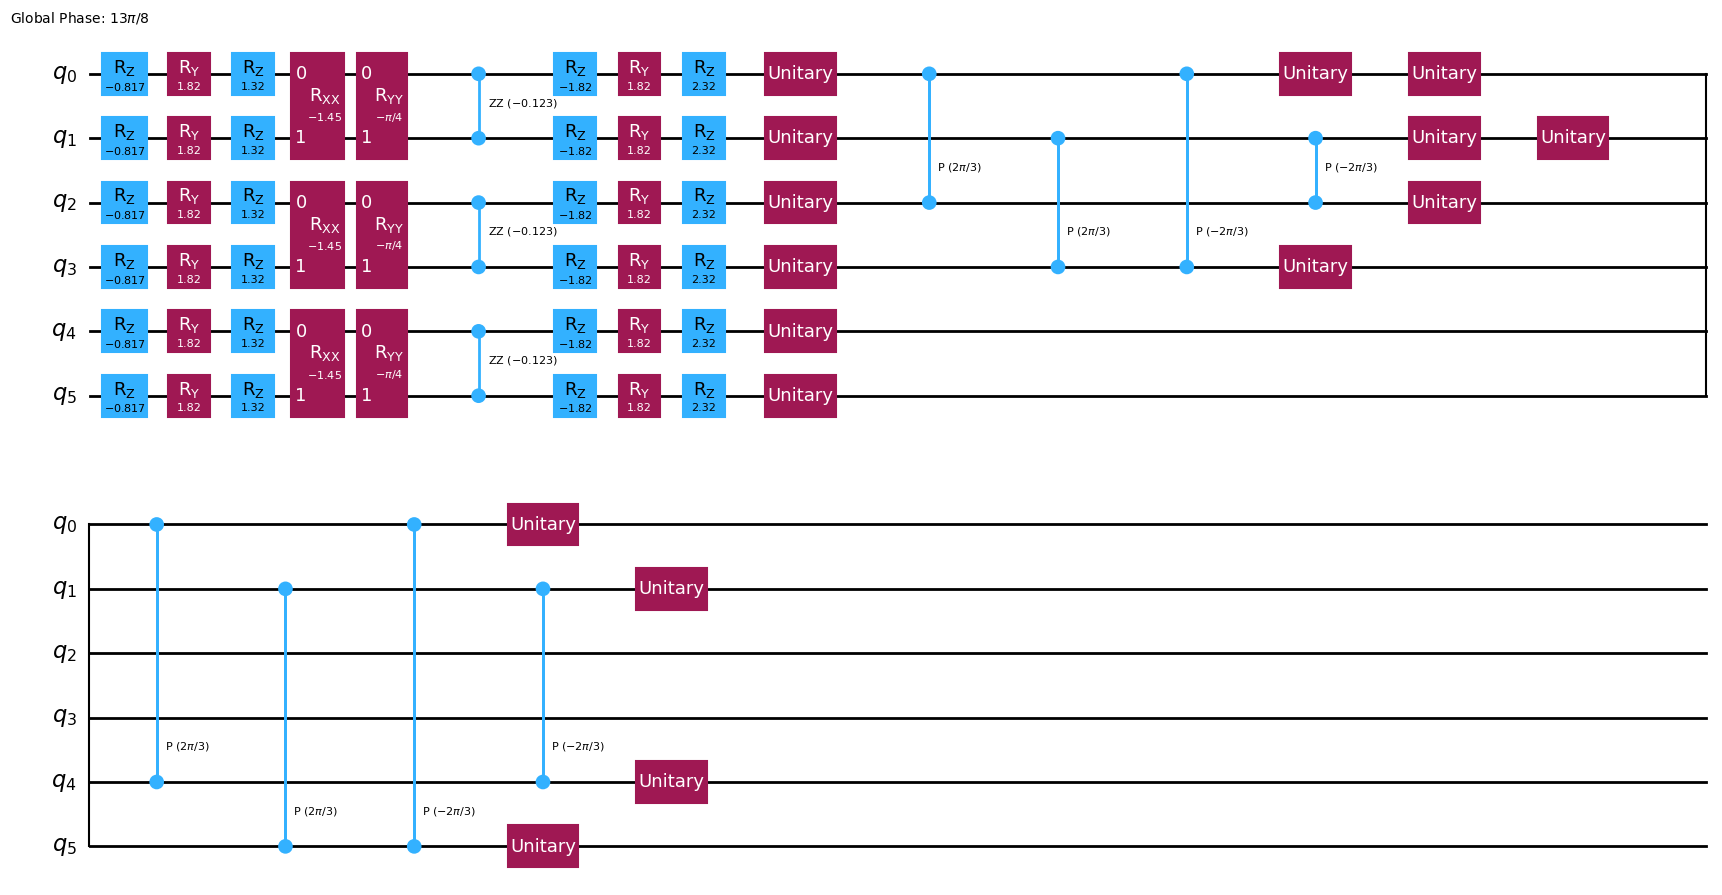

In [27]:
optiGHZ = QuantumCircuit(6)
optiGHZ.append(optiF, [0, 1])
optiGHZ.append(optiF, [2, 3])
optiGHZ.append(optiF, [4, 5])
optiGHZ.append(czqutrit, [0, 1, 2, 3])
optiGHZ.append(czqutrit, [0, 1, 4, 5])
optiGHZ.decompose().draw('mpl')

In [28]:
optiGHZ.decompose().depth()

17

In [29]:
optiGhzState = Statevector(optiGHZ)
optiGhzMatrix = optiGhzState.data.reshape((64,1))

cartanCircH2 = Operator(optiF).conjugate().transpose()

changeToDefault = cartanCircH2.tensor(cartanCircH2).tensor(Operator(np.identity(4))).to_matrix()

default = np.dot(changeToDefault, optiGhzMatrix)

In [30]:
Statevector(default).draw('latex')

<IPython.core.display.Latex object>